In [1]:
#Library
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Load Dataset
df=pd.read_csv("Walmart_Store_sales.csv")

In [3]:
#Descriptive Analysis
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
#missing values
df.isnull().sum()/len(df)*100

Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [7]:
#Covert date into months,day

#get day from the corresponding
df['day'] = pd.DatetimeIndex(df['Date']).day

# get month from the corresponding 
df['month'] = pd.DatetimeIndex(df['Date']).month_name()

# get year from the corresponding 
df['year'] = pd.DatetimeIndex(df['Date']).year

In [8]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2,May,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2,December,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,February,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,February,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,3,May,2010


In [9]:
#day wise count of complaints
dt=df.groupby(by='day')['Weekly_Sales'].mean().to_frame().sort_values('Weekly_Sales',ascending=False)
dt.reset_index(inplace=True)

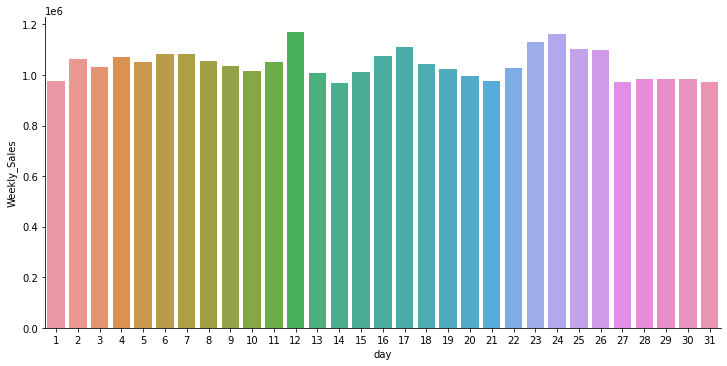

In [10]:
sns.catplot(x="day", y="Weekly_Sales", kind="bar", data=dt,height=5, aspect=2)

In [11]:
#month wise count of complaints
dt=df.groupby(by='month')['Weekly_Sales'].mean().to_frame().sort_values('Weekly_Sales',ascending=False)
dt.reset_index(inplace=True)

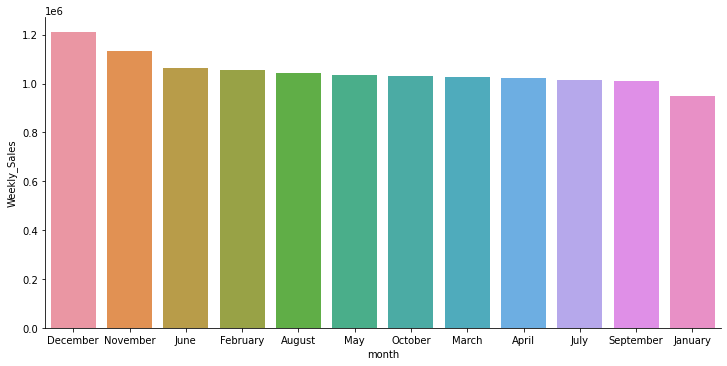

In [12]:
sns.catplot(x="month", y="Weekly_Sales", kind="bar", data=dt,height=5, aspect=2)

In [13]:
#year wise count of complaints
dt=df.groupby(by='year')['Weekly_Sales'].mean().to_frame().sort_values('Weekly_Sales',ascending=False)
dt.reset_index(inplace=True)

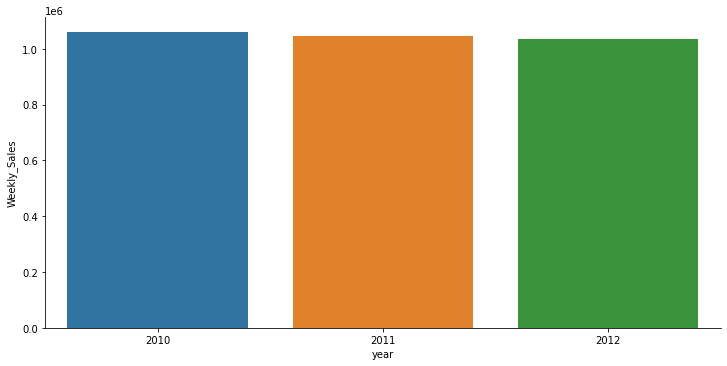

In [14]:
sns.catplot(x="year", y="Weekly_Sales", kind="bar", data=dt,height=5, aspect=2)

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

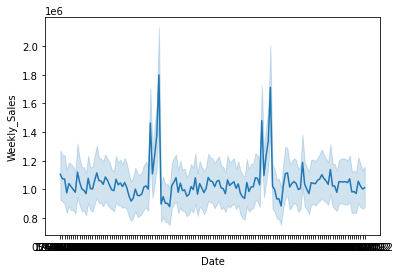

In [15]:
sns.lineplot(data=df, x="Date", y="Weekly_Sales")

## Which store has maximum sales

In [16]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [17]:
dt=df.groupby(by='Store')['Weekly_Sales'].mean().to_frame().sort_values('Weekly_Sales',ascending=False)

In [18]:
dt[dt['Weekly_Sales']==dt['Weekly_Sales'].max()]

,Weekly_Sales
Store,
20,2.107677e+06


## Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [19]:
dt=df.groupby(by='Store')['Weekly_Sales'].std().to_frame().sort_values('Weekly_Sales',ascending=False)

In [20]:
dt[dt['Weekly_Sales']==dt['Weekly_Sales'].max()]

,Weekly_Sales
Store,
14,317569.949476


In [21]:
#Coefficient of Weekly sales
mean=df.Weekly_Sales.mean()
st=df.Weekly_Sales.std()
coefficient=st/mean

In [22]:
coefficient* 100

53.90501956169007

In [23]:
#Coefficient of Weekly sales group by Store
mean=dt.Weekly_Sales.mean()
st=dt.Weekly_Sales.std()
coefficient=st/mean

In [24]:
coefficient* 100

57.3132065753782

## Which store/s has good quarterly growth rate in Q3’2012

In [25]:
Q3=df.loc[(df['year']==2012) & (df['month']=='September') | (df['month']=='October') | (df['month']=='November') | (df['month']=='December'),['Store','Weekly_Sales','month','year']]

In [26]:
Q3['month'].unique()

array(['December', 'November', 'October', 'September'], dtype=object)

In [27]:
Qu3=Q3.groupby(by='Store')['Weekly_Sales'].mean().to_frame().sort_values('Weekly_Sales',ascending=False)

In [28]:
Qu3[Qu3['Weekly_Sales']==Qu3['Weekly_Sales'].max()]

,Weekly_Sales
Store,
20,2.261746e+06


In [29]:
Q2=df.loc[(df['year']==2012) & (df['month']=='May') | (df['month']=='June') | (df['month']=='July') | (df['month']=='August'),['Store','Weekly_Sales','month','year']]

In [30]:
Qu2=Q2.groupby(by='Store')['Weekly_Sales'].mean().to_frame().sort_values('Weekly_Sales',ascending=False)

In [31]:
Qu2[Qu2['Weekly_Sales']==Qu2['Weekly_Sales'].max()]

,Weekly_Sales
Store,
4,2.069271e+06


In [32]:
growth_rate_Q3=Qu3-Qu2

In [33]:
growth_rate_Q3[growth_rate_Q3['Weekly_Sales']==growth_rate_Q3['Weekly_Sales'].max()]

,Weekly_Sales
Store,
10,247508.720878


## Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [34]:
Hd=df.groupby(by='Holiday_Flag')['Weekly_Sales'].mean().to_frame()
Hd.reset_index(inplace=True)

In [35]:
NonHoliday=Hd[Hd['Holiday_Flag']==0]
NonHoliday

,Holiday_Flag,Weekly_Sales
0,0,1.041256e+06


In [36]:
Holiday=Hd[Hd['Holiday_Flag']==1]
Holiday

,Holiday_Flag,Weekly_Sales
1,1,1.122888e+06


###### We can see the holiday sales is greater than non-holiday

In [37]:
hdnonhd=df.groupby(by=['Store','Holiday_Flag'])['Weekly_Sales'].mean().to_frame().sort_values('Store',ascending=True)
hdnonhd.reset_index(inplace=True)

In [38]:
hdnonhd.head(10)

,Store,Holiday_Flag,Weekly_Sales
0,1,0,1.546957e+06
1,1,1,1.665748e+06
2,2,0,1.914209e+06
3,2,1,2.079267e+06
4,3,0,4.000648e+05
5,3,1,4.378110e+05
6,4,0,2.083556e+06
7,4,1,2.243103e+06
8,5,0,3.148923e+05
9,5,1,3.595016e+05


In [39]:
hdnonhd.tail(10)

,Store,Holiday_Flag,Weekly_Sales
80,41,0,1.263101e+06
81,41,1,1.334948e+06
82,42,0,5.555550e+05
83,42,1,5.676942e+05
84,43,0,6.331276e+05
85,43,1,6.359463e+05
86,44,0,3.032536e+05
87,44,1,2.960356e+05
88,45,0,7.821985e+05
89,45,1,8.362937e+05


###### Most of the sales in holiday greater  than non-holiday sale

## Provide a monthly and semester view of sales in units and give insights

In [40]:
# Find their total sales as group by each store on monthly basis
store_group_monthly = df.groupby('month').agg({'Weekly_Sales': 'sum'})
store_group_monthly

,Weekly_Sales
month,
April,6.453239e+08
August,5.642317e+08
December,5.990761e+08
February,5.220257e+08
January,4.264263e+08
July,5.933139e+08
June,5.750180e+08
March,5.534864e+08
May,6.056966e+08


In [41]:
#month wise count of complaints
dt=df.groupby(by='month')['Weekly_Sales'].mean().to_frame().sort_values('Weekly_Sales',ascending=False)
dt.reset_index(inplace=True)

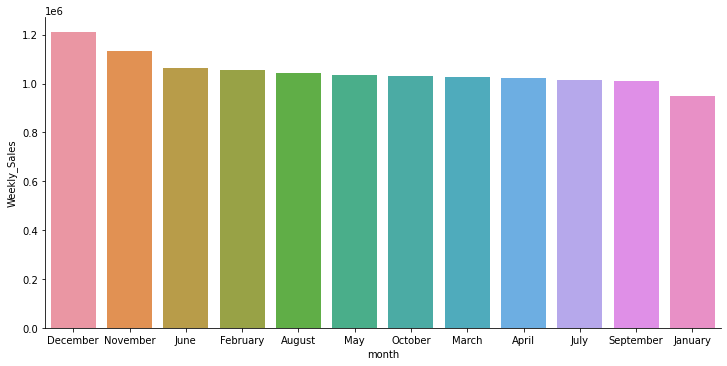

In [42]:
sns.catplot(x="month", y="Weekly_Sales", kind="bar", data=dt,height=5, aspect=2)

In [43]:
# Find their total sales as group by each store on year basis
store_group_yearly = df.groupby('year').agg({'Weekly_Sales': 'sum'})
store_group_yearly

,Weekly_Sales
year,
2010,2.288886e+09
2011,2.448200e+09
2012,2.000133e+09


In [44]:
#year wise count of complaints
dt=df.groupby(by='year')['Weekly_Sales'].mean().to_frame().sort_values('Weekly_Sales',ascending=False)
dt.reset_index(inplace=True)

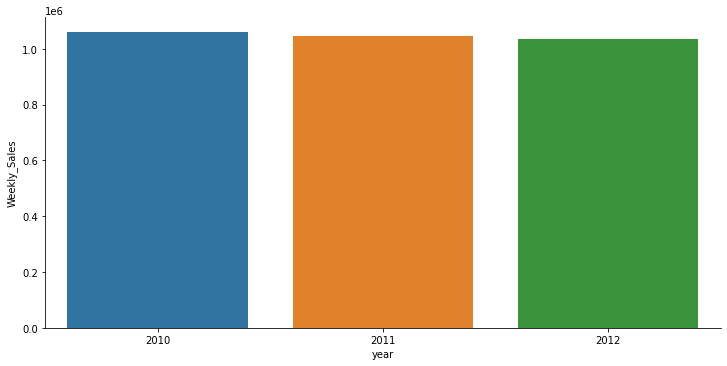

In [45]:
sns.catplot(x="year", y="Weekly_Sales", kind="bar", data=dt,height=5, aspect=2)

## Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.